#### GTZAN Dataset 샘플음성 데이터 mel_spec 변환 및 Augmentation 적용

In [1]:
import librosa
import librosa.display

import matplotlib.pyplot as plt
import os
import glob
import numpy as np
import IPython
import random

In [2]:
file_path = '../99_Studyfile/02_Sample/blues.00001.wav'
data, sr = librosa.load(file_path, sr=22050)    # 오디오파일 경로, 샘플링 주파수

#### 음성 데이터 STFT 변환

In [3]:
# 1. STFT 계산
stft = librosa.stft(data)

# 2. STFT --> dB로 변환
mel_spec = librosa.feature.melspectrogram(S=abs(stft))
mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)

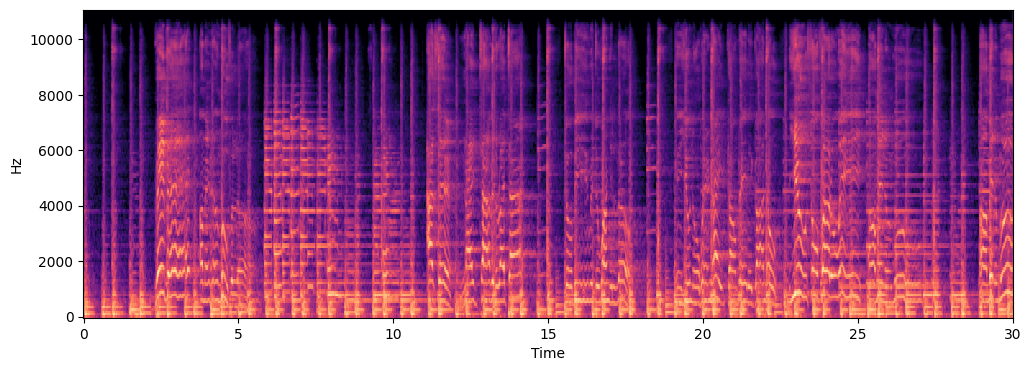

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [4]:
# 3. STFT 이미지 저장
plt.figure(figsize=(12,4))
librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time',y_axis='hz')
# plt.axis('off')
plt.savefig('../99_Studyfile/03_Output/mel_spec_original.png', bbox_inches='tight',pad_inches=0)

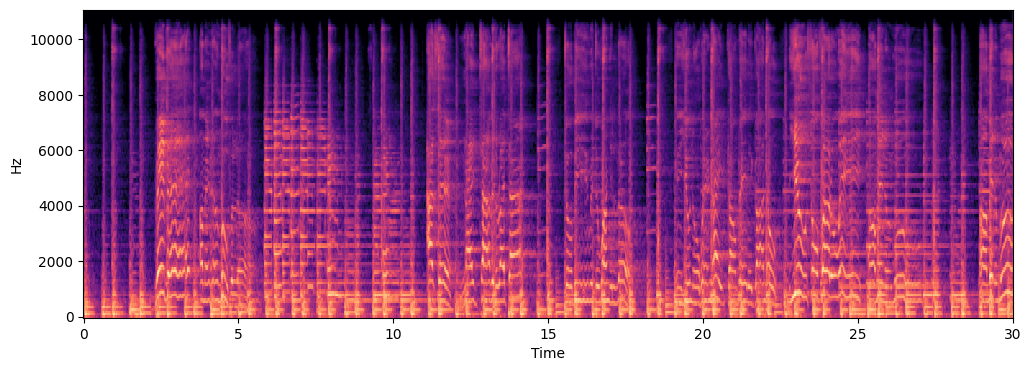

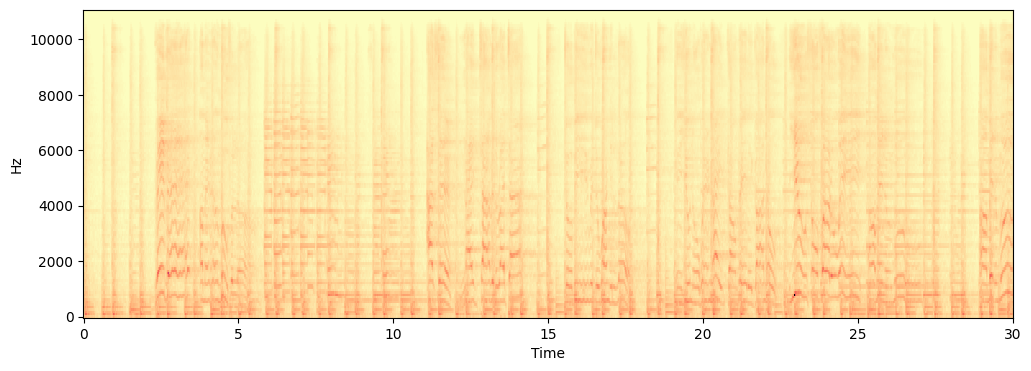

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [5]:
start_time = 0
end_time = 10
start_sample = sr * start_time
end_sample = sr * end_time

data_selection_stft = data[start_sample:end_sample]

stft_temp = librosa.stft(data_selection_stft)

# mel spectrogram 계산
mel_spec_temp = librosa.feature.melspectrogram(S=abs(stft_temp))

# dB 변경
mel_spec_db_temp = librosa.amplitude_to_db(mel_spec_db, ref=np.max)

plt.figure(figsize=(12,4))
librosa.display.specshow(mel_spec_db_temp, sr=sr, x_axis='time', y_axis='hz')
# plt.axis('off')
plt.savefig('../99_Studyfile/03_Output/mel_spec_0_10.png', bbox_inches='tight', pad_inches=0)

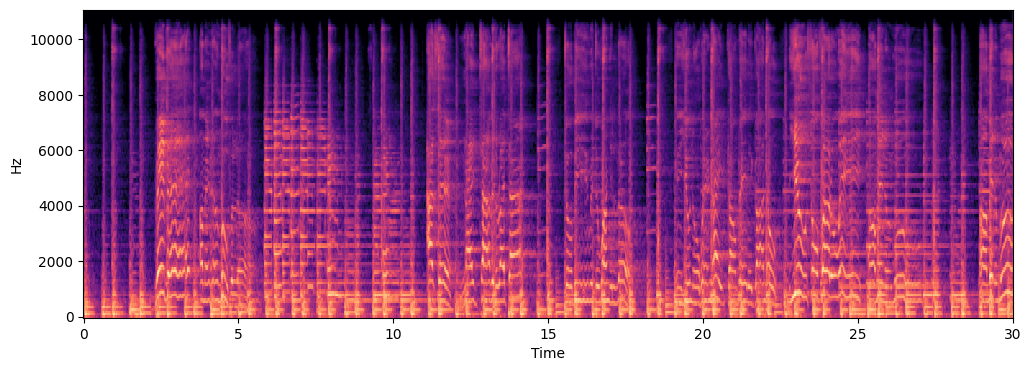

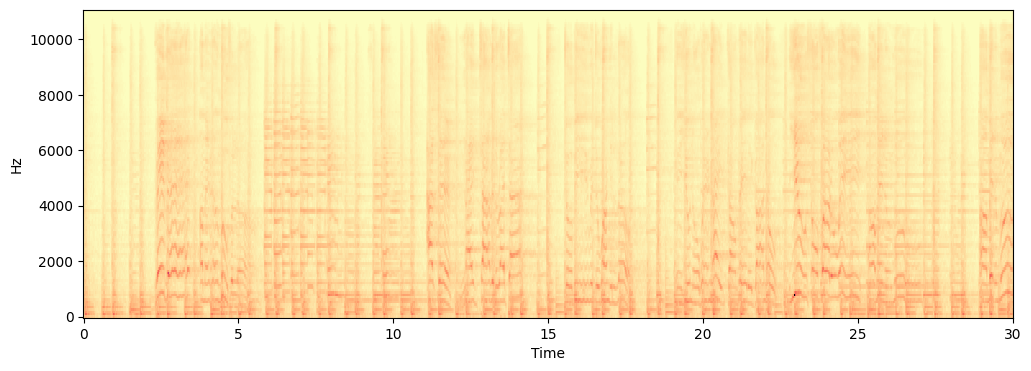

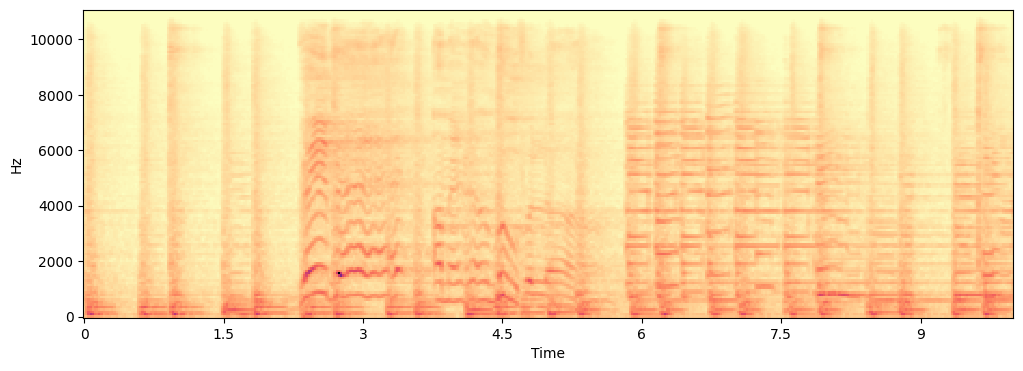

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [6]:
stft_temp_01 = librosa.stft(data_selection_stft)
mel_spec_temp01 = librosa.feature.melspectrogram(S=abs(stft_temp_01))

# dB 변경
mel_spec_db_temp01 = librosa.amplitude_to_db(mel_spec_temp01, ref=np.max)

# 노이즈 추가
noise = 0.2 * np.random.randn (*mel_spec_db_temp01.shape)
augmentation_noise_spec = mel_spec_db_temp01 + noise

# dB 변경
augmentation_spce_db = librosa.amplitude_to_db(augmentation_noise_spec, ref=np.max)
plt.figure (figsize=(12,4))
librosa.display.specshow(augmentation_spce_db,sr=sr,x_axis='time',y_axis='hz')
# pit.axis('off')
plt.savefig("../99_Studyfile/03_Output/mel_spec_0-10_aug_noise.png",bbox_inches='tight',pad_inches=0)

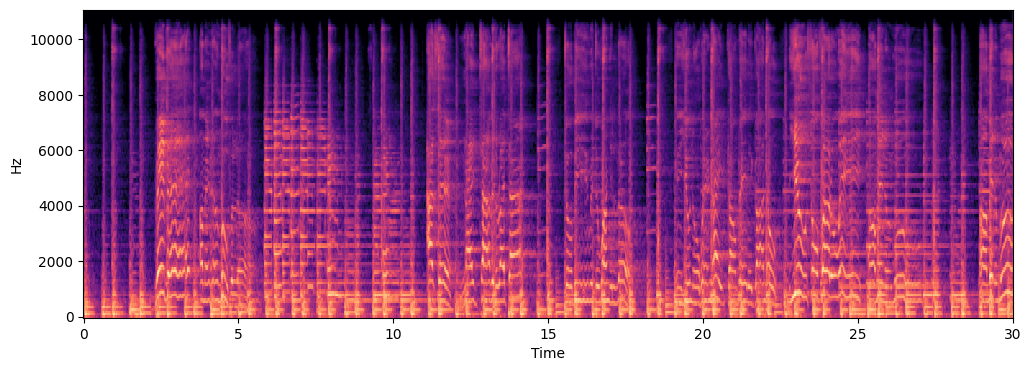

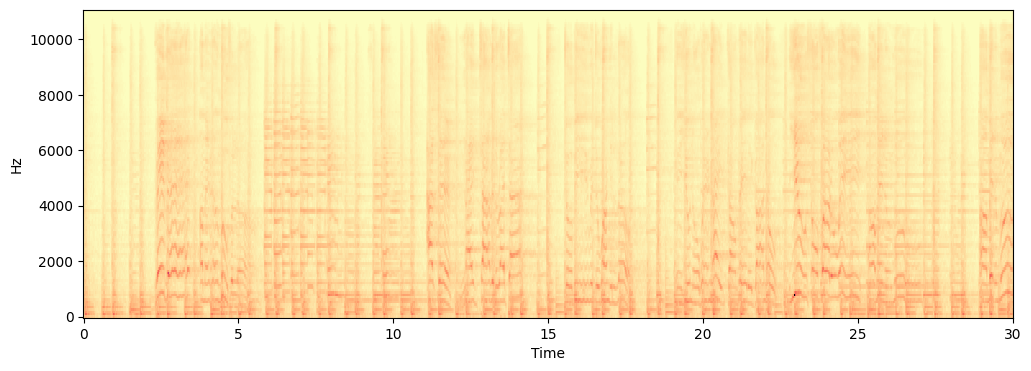

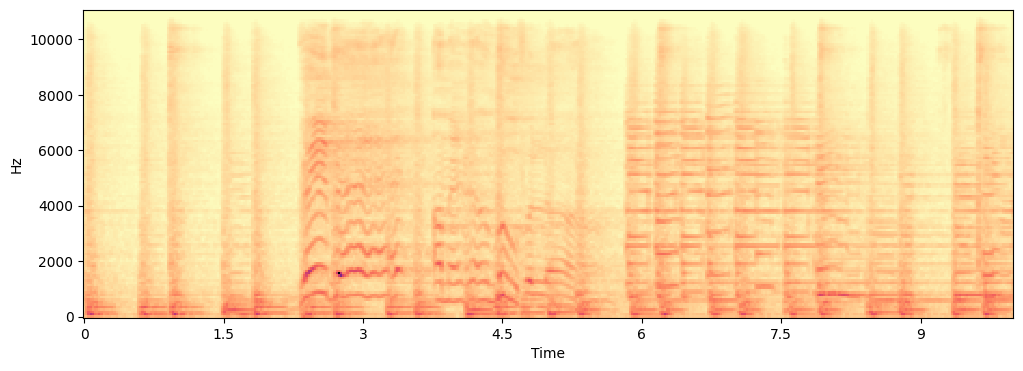

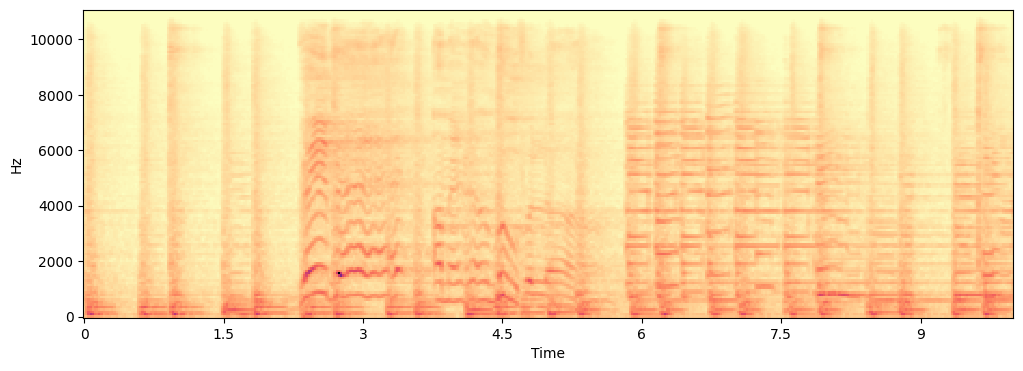

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [8]:
rate = np.random.uniform(low=0.8, high=1.2)
stretched = librosa.effects.time_stretch(data,rate=rate)

stft_stretched = librosa.stft(stretched)

mel_spec_stretched = librosa.feature.melspectrogram(S=abs(stft_stretched))

mel_spec_stretched_db = librosa.amplitude_to_db(augmentation_noise_spec, ref=np.max)

plt.figure(figsize=(12,4))
librosa.display.specshow(mel_spec_stretched_db, sr=sr, x_axis='time', y_axis='hz')
# plt.axis('off')
plt.savefig('../99_Studyfile/03_Output/mel_spec_0-10_aug_stretched.png',bbox_inches='tight', pad_inches=0)